# Интерферометр Фабри - Перо

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d
import pandas as pd

### Экспериментальная установка

Схема экспериментальной установки:

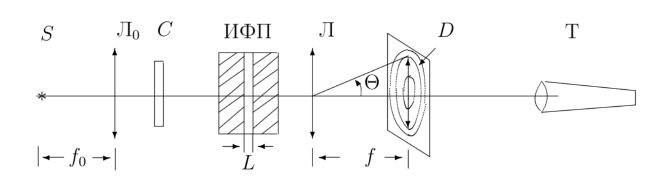
 
Свет от ртутной лампы $ S $, пройдя через линзу $ Л_0 $ и светофильтр $ C $, попадает на интерферометр Фабри-Перо (ИФП). Линза $ Л_0 $ служит для формирования пучка лучей (слегка сходящегося или слегка расходящегося). Интерференционные кольца наблюдаются в локальной плоскости линзы $ Л $. Картина рассматривается через зрительную трубу $ Т $, сфокусированную на эту плоскость. Диаметры колец измеряются с помощью микроскопа катетометра.
	
	

	
Зрительная труба $ Т $ и отсчетный микроскоп  --- элементы катетометра --- прибора, предназначенного для измерения расстояний в вертикальной плоскости вдоль вертикальной оси. 
При достаточной яркости ртутной лампы можно увидеть, что зелёная линия ртути состоит из нескольких компонентов. Расщепление этой спектральной линии связано с дополнительной энергией, возникающей как в результате взаимодействия магнитных моментов ядра и электрона --- сверхтонкая структура (магнитное поле ядра действует на спиновый магнитный момент электрона), так и с изотопическим сдвигом (в парах ртути присутствуют в заметных количествах изотопы с атомными массами от 198 до 204 а.е.м.). Каждое зелёное кольцо содержит более десятка близко расположенных компонентов, но разрешение нашего прибора не позволяет все их рассмотреть.

Спектр натриевой лампы исследуется по аналогичной схеме, но светофильтр в этом случае не нужен, а интерферометр, линзы и зрительная труба катетометра имеют другие параметры.

### Измерение диаметров зелёных колец ртутной лампы

In [69]:
green_data = pd.read_csv('green.csv')
green_data

,N,l1,l2,di_sq,sigma_d_i
0,1,167.61,179.85,1.50,0.01
1,2,163.87,183.55,3.88,0.03
2,3,161.19,186.11,6.21,0.05
3,4,159.16,188.15,8.40,0.07
4,5,157.39,189.96,10.61,0.09
5,6,155.82,191.55,12.77,0.11


График зависимости $d_{m}^{2}$ от $m$ зеленых линий ртутной лампы

In [70]:
MNK_green = linregress(green_data.N, green_data.di_sq)

N_line = np.linspace(0, max(green_data.N) + 1, 1000)
d_sq = MNK_green.slope * N_line + MNK_green.intercept

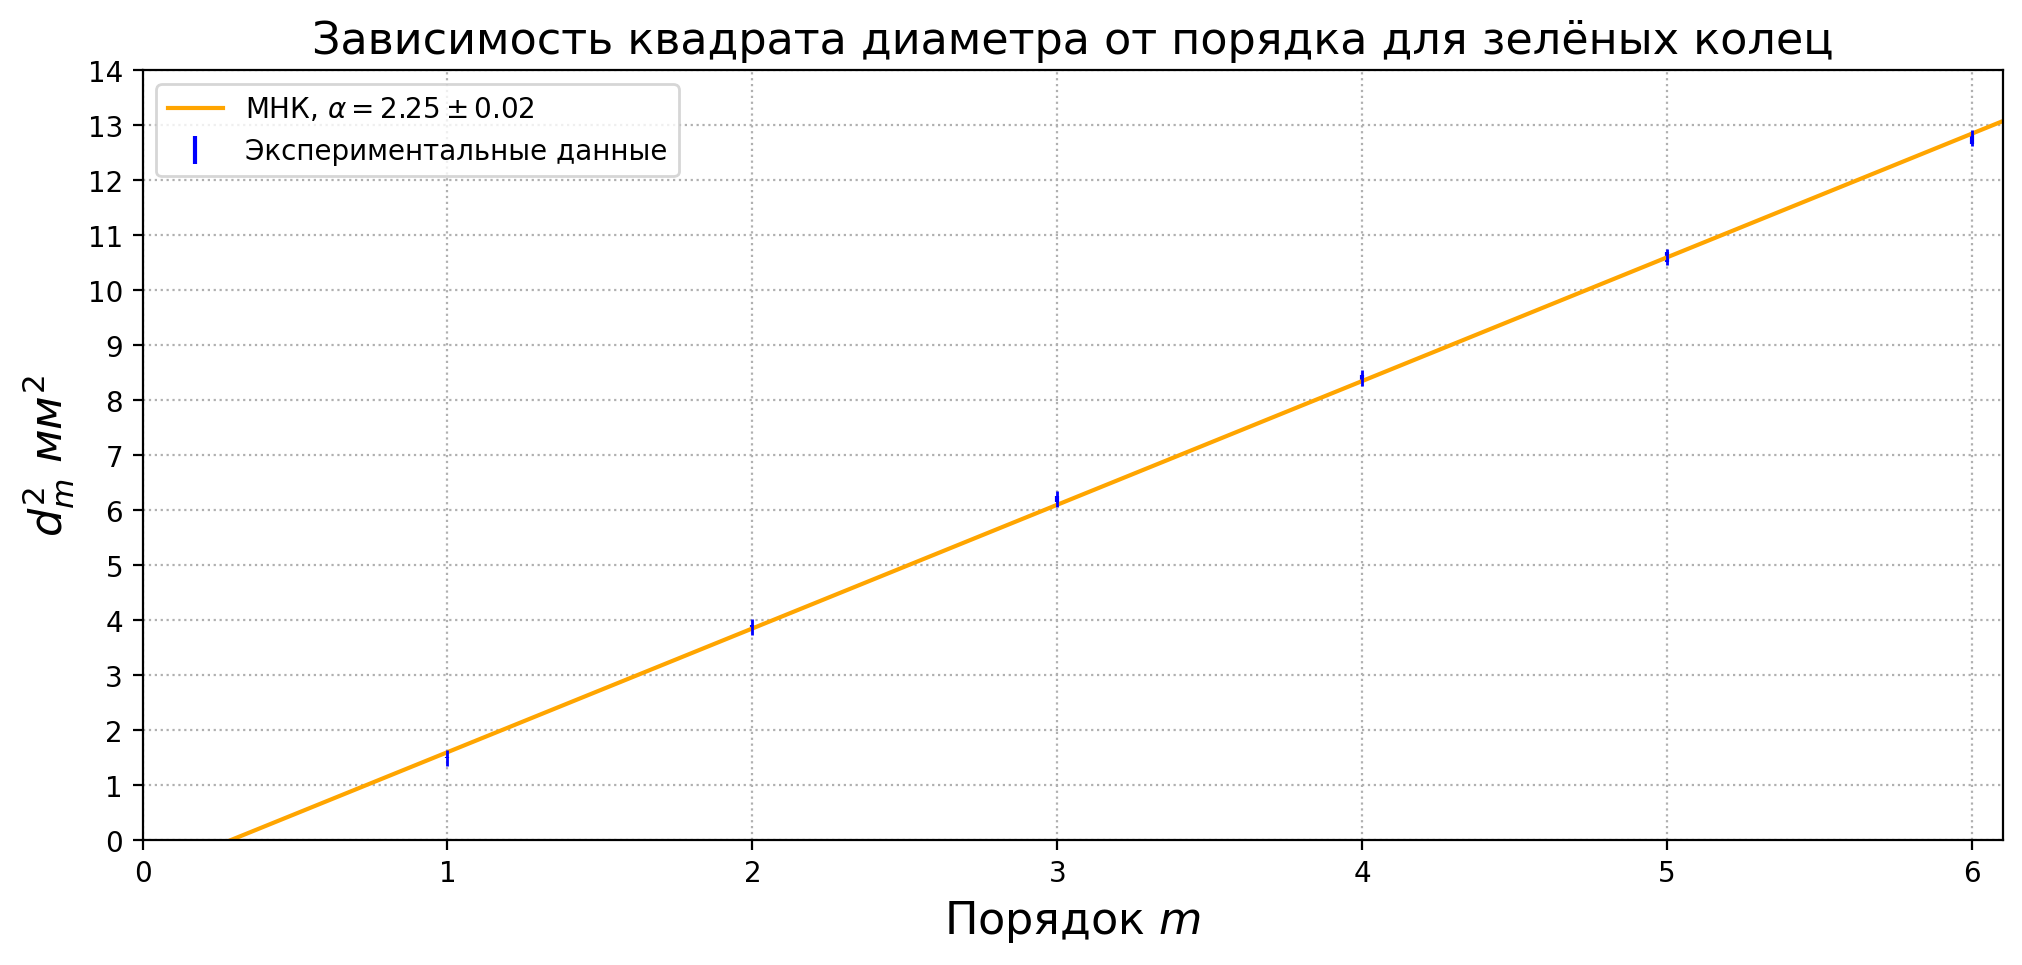

In [71]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.errorbar(green_data.N, 
             green_data.di_sq,
             color = 'blue',
             label = 'Экспериментальные данные',
             yerr = green_data.sigma_d_i,
             fmt = '|')

plt.plot(N_line, 
         d_sq, 
         label = r'МНК, $\alpha = {} \pm {}$'.format(round(MNK_green.slope, 2),
                                                    round(MNK_green.stderr, 2)),
        color = 'orange')

plt.xlim(0, 6.1)
plt.ylim(0, 14)
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 15, 1))
plt.grid(ls = ':')

plt.legend(loc = 'upper left')
plt.xlabel("Порядок $m$",
           fontsize = 16)
plt.ylabel("$d_{m}^{2} \ мм^{2}$",
           fontsize = 16)
plt.title("Зависимость квадрата диаметра от порядка для зелёных колец", 
          fontsize = 16);

Вычислим разность длин волн

$L(Na) \sim 0.1 \ мм, \ L(Hg) \sim 3 \ мм, \ \lambda \sim 6000 \ A$

$$
f = 110 \ мм
$$

Используем формулу:

$$
\Delta \lambda_{р} = \frac{\lambda \alpha}{4 f^{2}}
$$

И базу интерферометра

$$
L = \frac{4 f^{2} \lambda}{\alpha}
$$



In [72]:
lambd = 6000 * np.power(0.1, 7)
f = 110 
alpha = MNK_green.slope 
delta_lambda_green = lambd * alpha / (4 * np.power(f, 2))

L = 4 * np.power(f, 2) * lambd / alpha
print("База: ", L/100);

База:  0.12909945382954402


База $0.13 \ мм$ - похоже на реальное значение

$$
\Delta \lambda_{р} = 3.9 \pm 0.35 \ А
$$

### Для желтых колец - зависимость $\overline{d}$ от $1 /\Delta d$

In [73]:
yellow_data = pd.read_csv('yellow.csv')
yellow_data

,N,l1,l2,d,d_mean,sigm_d,delta_d,div_delta_d,sigma
0,1,170.38,176.93,6.550,6.55,0.42,0.00,0.00,0.00
1,2,166.66,180.88,14.220,15.78,0.42,3.12,0.32,0.04
2,3,162.94,184.27,21.330,22.31,0.42,1.97,0.51,0.08
3,4,160.53,186.85,26.315,27.15,0.42,1.68,0.60,0.12
4,5,158.36,188.95,30.585,30.96,0.42,1.35,0.74,0.18
5,6,156.62,190.66,34.045,34.61,0.42,1.11,0.90,0.24


In [74]:
MNK_yellow = linregress(yellow_data.div_delta_d,
                        yellow_data.d_mean)

line_div_d = np.linspace(0, 1, 1000)
line_d_mean = MNK_yellow.slope * line_div_d + MNK_yellow.intercept

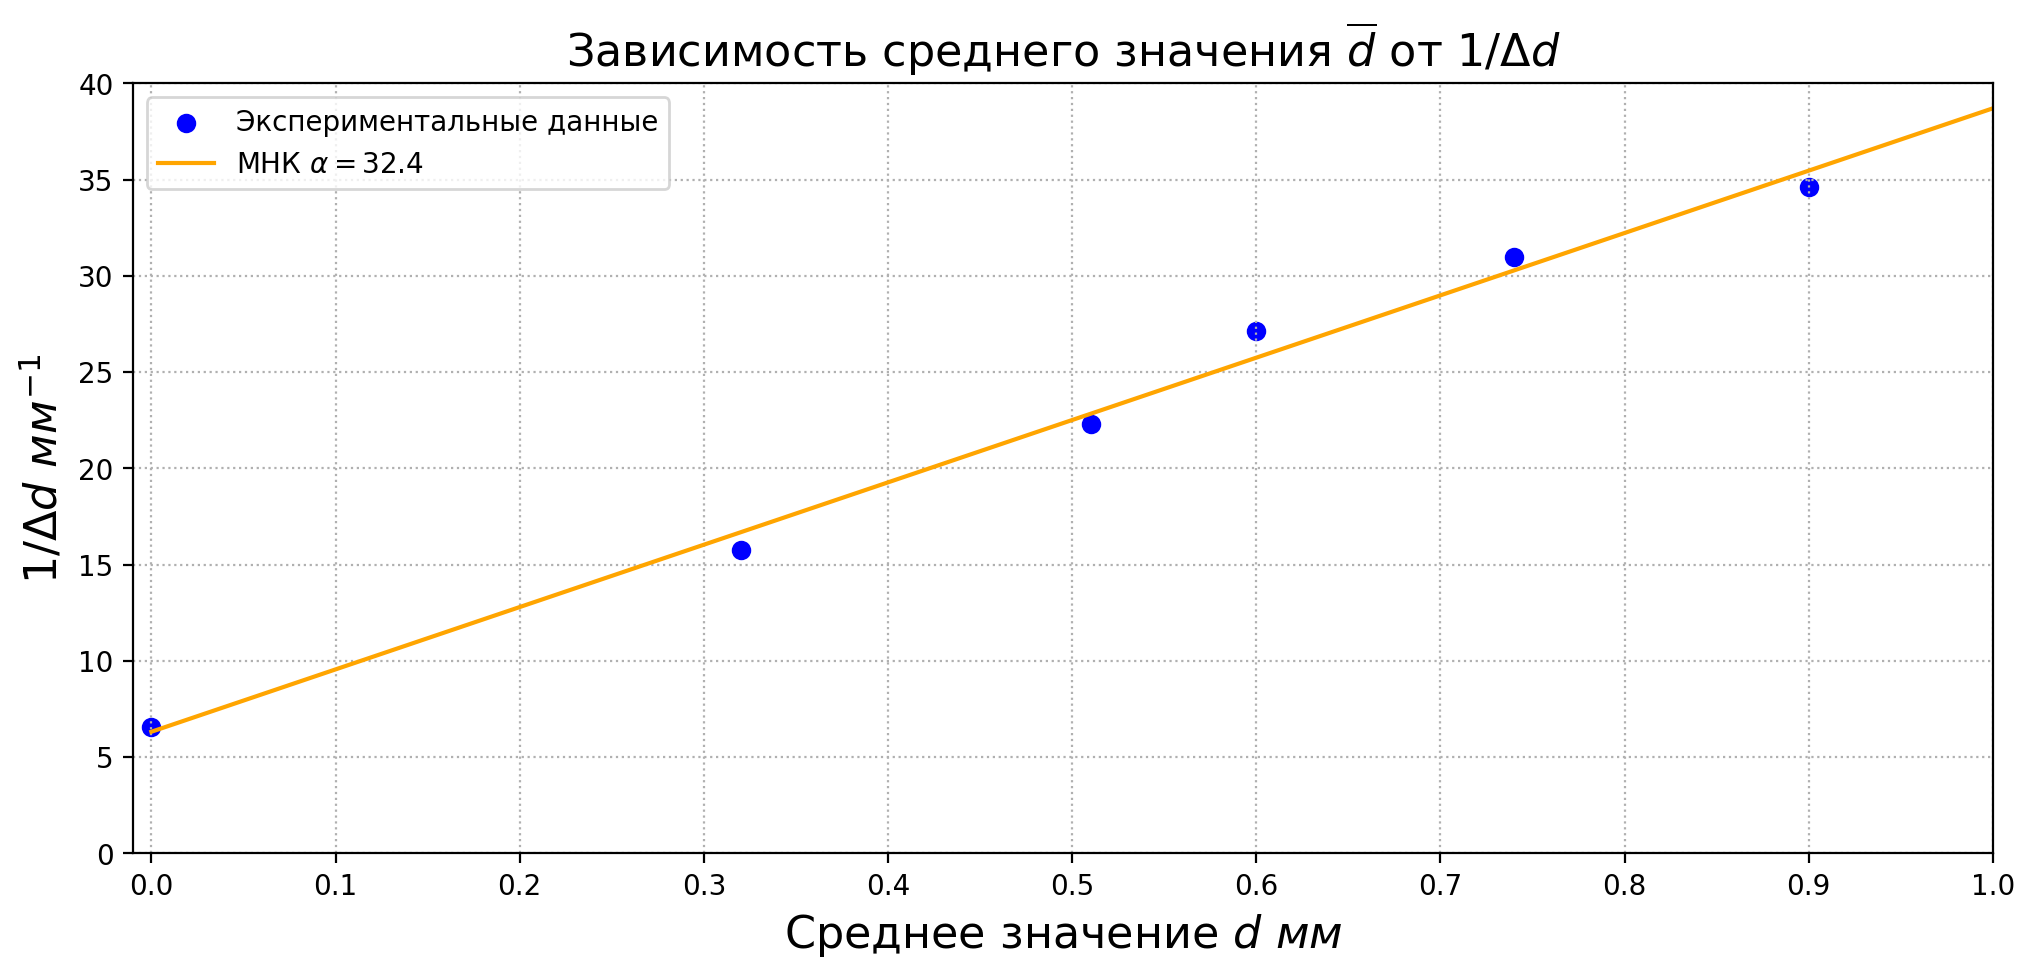

In [75]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.scatter(yellow_data.div_delta_d,
         yellow_data.d_mean,
         color = 'blue',
         label  = 'Экспериментальные данные')

plt.plot(line_div_d, 
         line_d_mean,
         color = 'orange',
         label = r'МНК $\alpha = {}$'.format(round(MNK_yellow.slope, 1)))

plt.xlim(-0.01, 1)
plt.ylim(0, 40)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 45, 5))
plt.grid(ls = ':')

plt.legend(loc = 'upper left')
plt.xlabel("Среднее значение $d \ мм$", fontsize = 16)
plt.ylabel("$1/ \Delta d \ мм^{-1}$", fontsize = 16)
plt.title("Зависимость среднего значения $\overline{d}$ от $1/\Delta d$",
          fontsize = 16);

Разность длин волн
$$
\Delta \lambda = 5.6 \pm 0.4 А 
$$

Разрешающая способность:

$$
R = \frac{4 f^{2}}{d \delta r}
$$

Для зеленых: $5.5 \cdot 10^{3}$

Для желтеньких: $7.1 \cdot 10^{3}$

##### dm m - желтенькие

In [76]:
yellow_data['di_sq'] = np.power(yellow_data.d, 2) / 100

In [77]:
MNK_green = linregress(yellow_data.N, yellow_data.di_sq)

N_line = np.linspace(0, max(yellow_data.N) + 1, 1000)
d_sq = MNK_green.slope * N_line + MNK_green.intercept

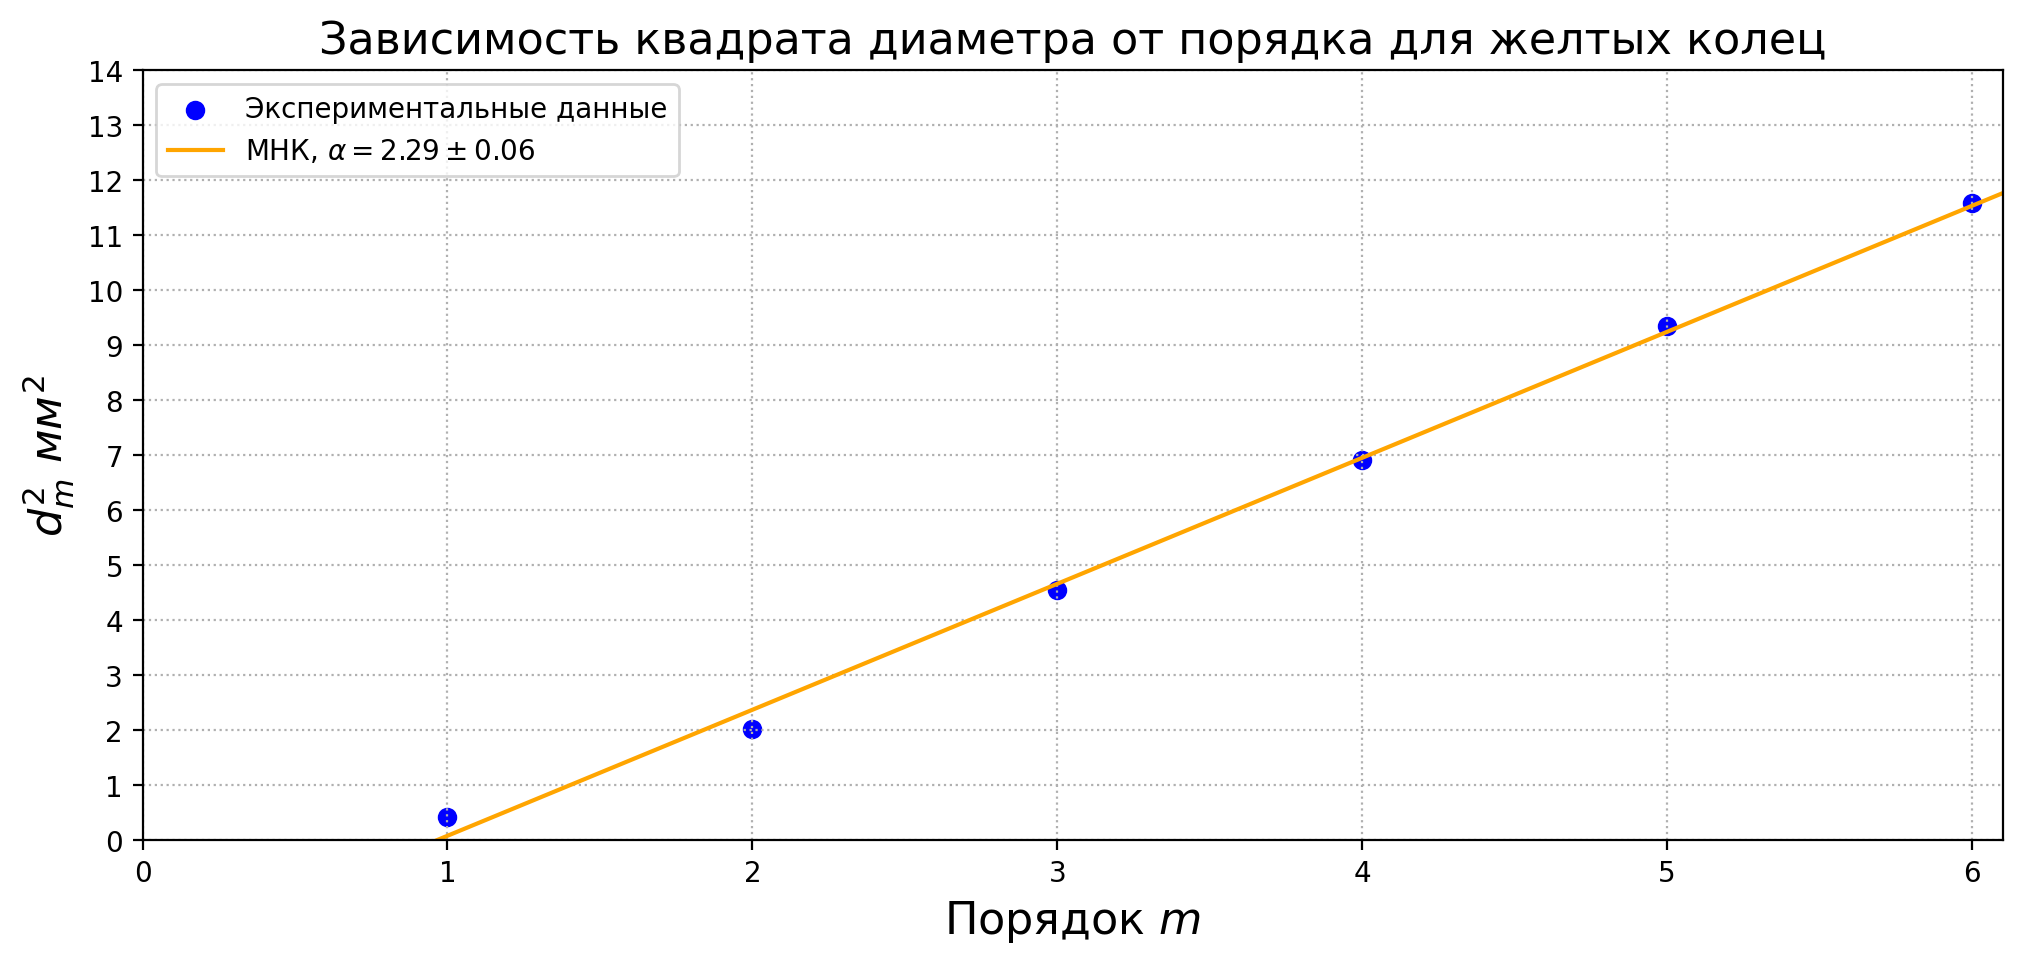

In [79]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.scatter(yellow_data.N, 
             yellow_data.di_sq,
             color = 'blue',
             label = 'Экспериментальные данные')

plt.plot(N_line, 
         d_sq, 
         label = r'МНК, $\alpha = {} \pm {}$'.format(round(MNK_green.slope, 2),
                                                    round(MNK_green.stderr, 2)),
        color = 'orange')

plt.xlim(0, 6.1)
plt.ylim(0, 14)
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 15, 1))
plt.grid(ls = ':')

plt.legend(loc = 'upper left')
plt.xlabel("Порядок $m$",
           fontsize = 16)
plt.ylabel("$d_{m}^{2} \ мм^{2}$",
           fontsize = 16)
plt.title("Зависимость квадрата диаметра от порядка для желтых колец", 
          fontsize = 16);